In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas

from collections import defaultdict, Counter

# Exercise 5
<img src="img/Exercise05.png" width=600>

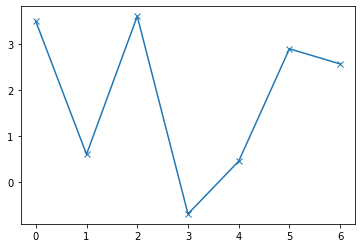

In [234]:
data = np.array([
    [0, 3.5],
    [1, 0.6],
    [2, 3.61],
    [3, -0.7],
    [4, 0.45],
    [5, 2.9],
    [6, 2.57]
])

plt.plot(data[:, 0], data[:, 1], "x-")

In [235]:
def prior(a):
    return flat(a, lower=-10, upper=10)

prior(2)

0.05

In [236]:
def func(x, a):
    return a*np.cos(x)

In [ ]:
def likelihood_exponent(a, data, f=func, b=1.1):
    x, y = data.transpose()
    return np.array([
        np.sum(np.abs(y - f(x, aa))) if np.all(y > f(x, aa)) else 0 for aa in a
    ])

def log_likelihood(a, data, f=func, b=1.1):

    return likelihood_exponent(a, data, f=func, b=1.1) -len(data) * np.log(b)


In [339]:
def log_likelihood(a, data, f=func, b=1.1):
    
    # error is one sided gaussian, only positive errors are allowed
    # 

    return np.exp(-len(data) * np.log(b) 
        + np.sum([
            np.abs(y - f(x, a)) for x, y in data
        ], axis=0)
    ) * np.all([
        (f(x, a) < y) for x, y in data
    ], axis=0)


log_likelihood(2, data=data)

0.0

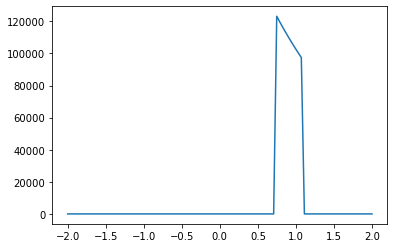

In [340]:
a = np.linspace(-2, 2, 100)
plt.plot(a, log_likelihood(a, data))

In [335]:
def log_posterior(a, data, f=func):
    return log_likelihood(a, data=data, f=f) + np.log(prior(a))

log_posterior(2, data=data)

-2.995732273553991

Text(0, 0.5, 'p(a|data)')

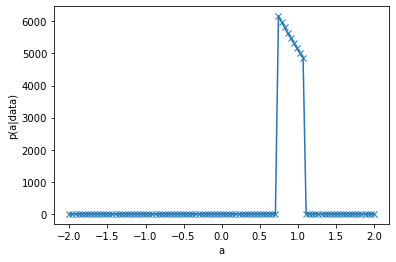

In [336]:
a = np.linspace(-2, 2, 100)
plt.plot(a, np.exp(log_posterior(a, data=data)), "x-")

plt.xlabel("a")
plt.ylabel("p(a|data)")

### Expectation for a

In [317]:
a_expected = a[np.nanargmax(log_posterior(a, data=data))]
a_expected

-2.0

Text(0, 0.5, 'f(x)')

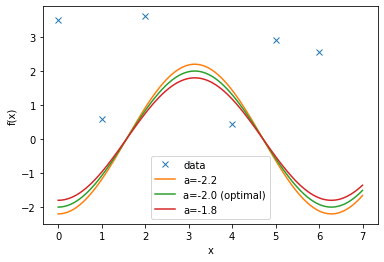

In [301]:
plt.plot(data[:, 0], data[:, 1], "x", label="data")

x = np.linspace(0, 7, 100)
plt.plot(x, func(x, a_expected*1.1), label=f"a={a_expected*1.1:1.1f}")
plt.plot(x, func(x, a_expected), label=f"a={a_expected:1.1f} (optimal)")
plt.plot(x, func(x, a_expected*0.9), label=f"a={a_expected*0.9:1.1f}")

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")